# Data Understanding

In [ ]:
import pandas as pd
import numpy as np
# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("forestdata.csv")
df.head(5)

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


In [ ]:
df_copy = df.copy()
df_train = df_copy.sample(frac=0.75, random_state=0)
df_test = df_copy.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)

(342, 12)
(114, 12)


In [ ]:
df_train

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
102,3,13.85,2.757436,0.056710,17.91,6.587412,3.073015,60.0,0.55104,4,night,0
60,5,11.61,2.925745,0.223509,15.89,6.164787,3.164517,58.0,0.61050,11,night,0
278,9,10.86,2.718282,0.000000,20.67,6.021751,3.020074,61.0,0.50000,10,night,0
144,10,12.45,3.212205,0.240855,30.19,6.364062,3.079236,52.0,0.63420,10,night,0
179,10,13.85,2.755256,0.113966,29.63,6.618872,3.059615,61.0,0.55890,1,afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62,2,11.43,2.816939,0.142893,12.67,6.135565,3.084439,59.0,0.58476,3,night,0
346,11,12.77,2.805577,0.142346,53.65,6.362166,2.999447,61.0,0.54773,1,morning,0
130,10,14.76,2.849542,0.175348,29.06,6.780831,3.094895,58.0,0.62510,1,afternoon,0
187,7,10.95,3.034493,0.281759,16.97,6.242223,3.354620,57.0,0.64240,7,morning,1


In [ ]:
# data types and summary stats...
# "include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones

df_train.describe(include="all")

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
count,342.000000,342.000000,342.000000,342.000000,341.000000,342.000000,342.000000,341.000000,342.000000,342.000000,342,342.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,night,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127,NaN
mean,5.725146,20.092886,3.009922,0.247321,41.711862,6.634843,3.130011,56.299120,0.612921,6.748538,NaN,0.374269
std,2.946325,106.906708,0.313230,0.202947,45.673978,0.561349,0.080243,5.748015,0.065094,3.426811,NaN,0.484643
min,1.000000,7.729000,2.718282,0.000000,7.228000,5.489764,2.926373,21.000000,0.500000,1.000000,NaN,0.000000
25%,3.000000,11.770000,2.800204,0.096757,17.740000,6.264587,3.076122,54.000000,0.564248,4.000000,NaN,0.000000
50%,5.000000,13.360000,2.888364,0.162500,24.680000,6.530220,3.125777,58.000000,0.599255,7.000000,NaN,0.000000
75%,8.000000,16.230000,3.130414,0.372105,48.310000,7.043086,3.174939,60.000000,0.657850,9.000000,NaN,1.000000


In [ ]:
# count the nulls/missing data in each column
# not too bad - we might need to fill/delete these rows later
df_train.isnull().sum()

collector.id      0
c.score           0
l.score           0
rain              0
tree.age          1
surface.litter    0
wind.intensity    0
humidity          1
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

array([[<Axes: title={'center': 'collector.id'}>,
        <Axes: title={'center': 'c.score'}>,
        <Axes: title={'center': 'l.score'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'tree.age'}>,
        <Axes: title={'center': 'surface.litter'}>],
       [<Axes: title={'center': 'wind.intensity'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tree.density'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'fire'}>, <Axes: >]], dtype=object)

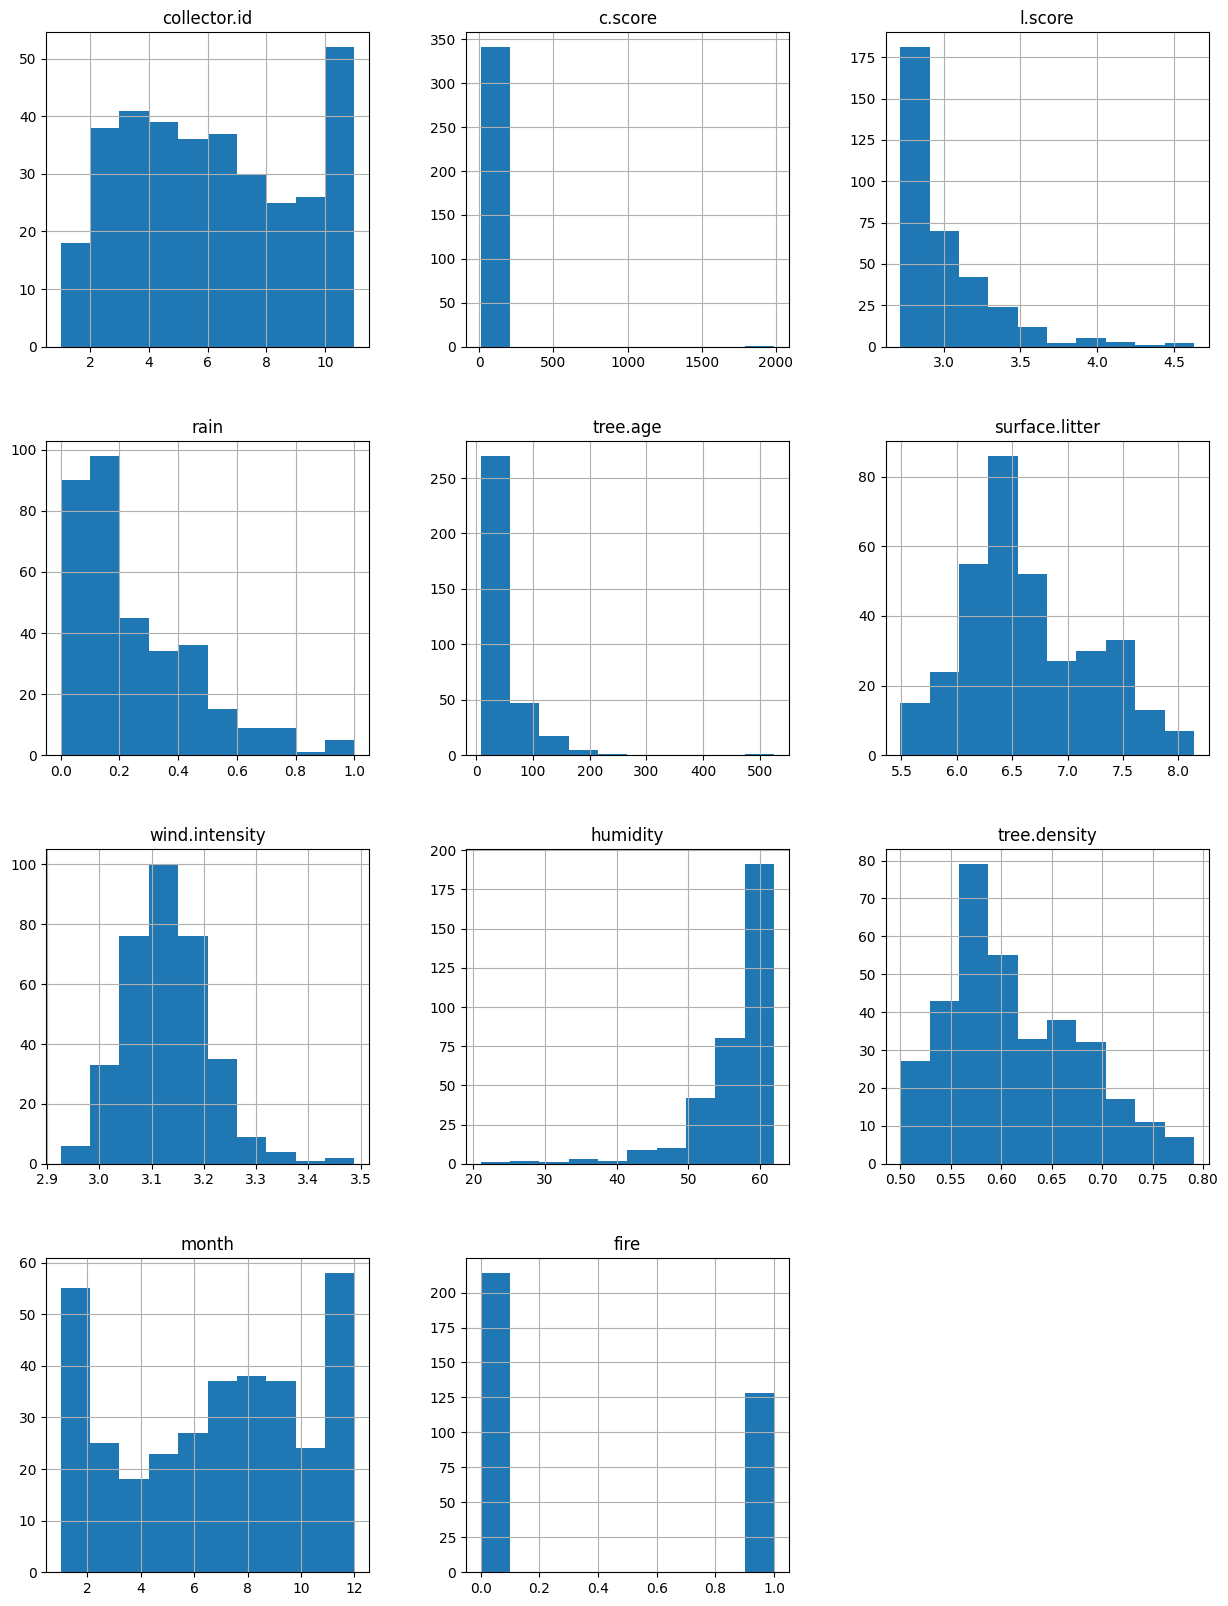

In [ ]:
df_train.hist(figsize = (15,20))

In [ ]:
df_train.dtypes

collector.id        int64
c.score           float64
l.score           float64
rain              float64
tree.age          float64
surface.litter    float64
wind.intensity    float64
humidity          float64
tree.density      float64
month               int64
time.of.day        object
fire                int64
dtype: object

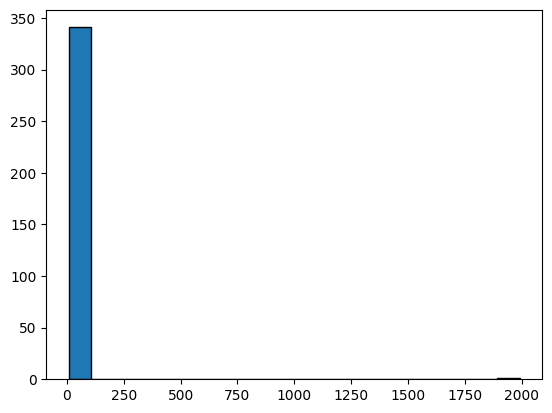

In [ ]:
    import matplotlib.pyplot as plt
    plt.hist(df_train['c.score'], bins=20, edgecolor='black')
    plt.show()


In [ ]:
count1 =df_train['c.score'].duplicated()
print(count1)

102    False
60     False
278    False
144    False
179     True
       ...  
62      True
346     True
130    False
187    False
23     False
Name: c.score, Length: 342, dtype: bool


# Data Preparation

In [ ]:
Q1 = df_train['tree.age'].quantile(0.25)
Q3 = df_train['tree.age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df_train[(df['tree.age'] < lower_bound) | (df_train['tree.age'] > upper_bound)]

mean_value = df_train['tree.age'].mean()

df_train.loc[(df_train['tree.age'] < lower_bound) | (df_train['tree.age'] > upper_bound), 'tree.age'] = mean_value


<ipython-input-10-b69717b14424>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_train[(df['tree.age'] < lower_bound) | (df_train['tree.age'] > upper_bound)]


In [ ]:
Q1 = df['c.score'].quantile(0.25)
Q3 = df['c.score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df[(df['c.score'] < lower_bound) | (df['c.score'] > upper_bound)]

mean_value1 = df_train['c.score'].mean()

df_train.loc[(df_train['c.score'] < lower_bound) | (df_train['c.score'] > upper_bound), 'c.score'] = mean_value1


In [ ]:
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df[(df['humidity'] < lower_bound) | (df['humidity'] > upper_bound)]

mean_value2 = df_train['humidity'].mean()

df_train.loc[(df_train['humidity'] < lower_bound) | (df_train['humidity'] > upper_bound), 'humidity'] = mean_value2


In [ ]:
rows_with_value = df_train[df_train['c.score'] == 1990.200000]
print(rows_with_value)

Empty DataFrame
Columns: [collector.id, c.score, l.score, rain, tree.age, surface.litter, wind.intensity, humidity, tree.density, month, time.of.day, fire]
Index: []


In [ ]:
df_train['c.score'] = df_train['c.score'].replace({1990.200000: 20.092886})


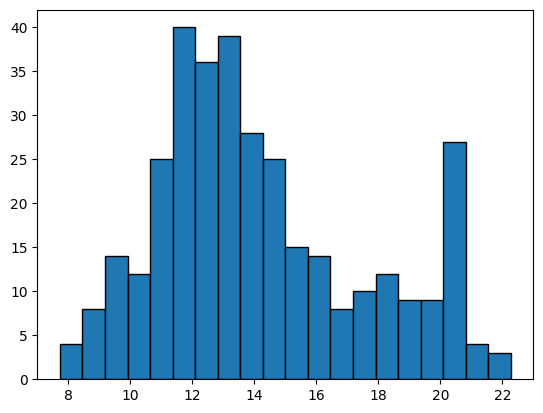

In [ ]:
    import matplotlib.pyplot as plt
    plt.hist(df_train['c.score'], bins=20, edgecolor='black')
    plt.show()


In [ ]:
df_train.isnull().sum()
df_train['tree.age'].fillna(df_train['tree.age'].mean(), inplace=True)
df_train['humidity'].fillna(df_train['humidity'].median(), inplace=True)

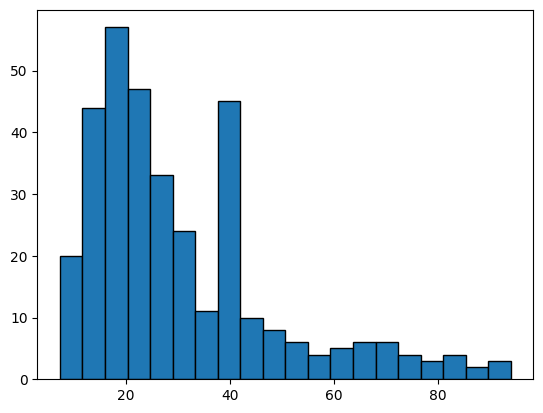

In [ ]:
    import matplotlib.pyplot as plt
    plt.hist(df_train['tree.age'], bins=20, edgecolor='black')
    plt.show()

In [ ]:
df_test.isnull().sum()
df_test.describe(include="all")

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
count,114.000000,114.000000,113.000000,113.000000,114.000000,114.000000,113.000000,112.000000,114.000000,114.000000,114,114.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,night,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN
mean,5.745614,31.151965,3.013718,0.241704,41.591746,6.588213,3.141308,56.026786,0.615848,6.684211,NaN,0.350877
std,2.858960,185.137038,0.331377,0.195534,58.249459,0.572725,0.084353,7.166564,0.072878,3.452114,NaN,0.479352
min,1.000000,6.981000,2.718282,0.000000,6.802000,5.221436,2.995465,10.000000,0.500000,1.000000,NaN,0.000000
25%,3.000000,11.555000,2.790893,0.092793,17.770000,6.205466,3.084439,54.750000,0.558840,3.250000,NaN,0.000000
50%,6.000000,13.020000,2.895551,0.173111,24.235000,6.493224,3.132738,58.000000,0.598160,7.500000,NaN,0.000000
75%,8.000000,15.335000,3.076814,0.395179,42.665000,6.845432,3.189119,60.000000,0.671500,9.000000,NaN,1.000000


In [ ]:
df_test['l.score'].fillna(df_test['l.score'].mean(), inplace=True)
df_test['rain'].fillna(df_test['rain'].mean(), inplace=True)
df_test['wind.intensity'].fillna(df_test['wind.intensity'].mean(), inplace=True)
df_test['humidity'].fillna(df_test['humidity'].median(), inplace=True)


In [ ]:
df_test.isnull().sum()
df_test['time.of.day'] = df_test['time.of.day'].replace({'morni7ng' : 'morning'})
df_test['time.of.day'].unique()

array(['afternoon', 'night', 'morning'], dtype=object)

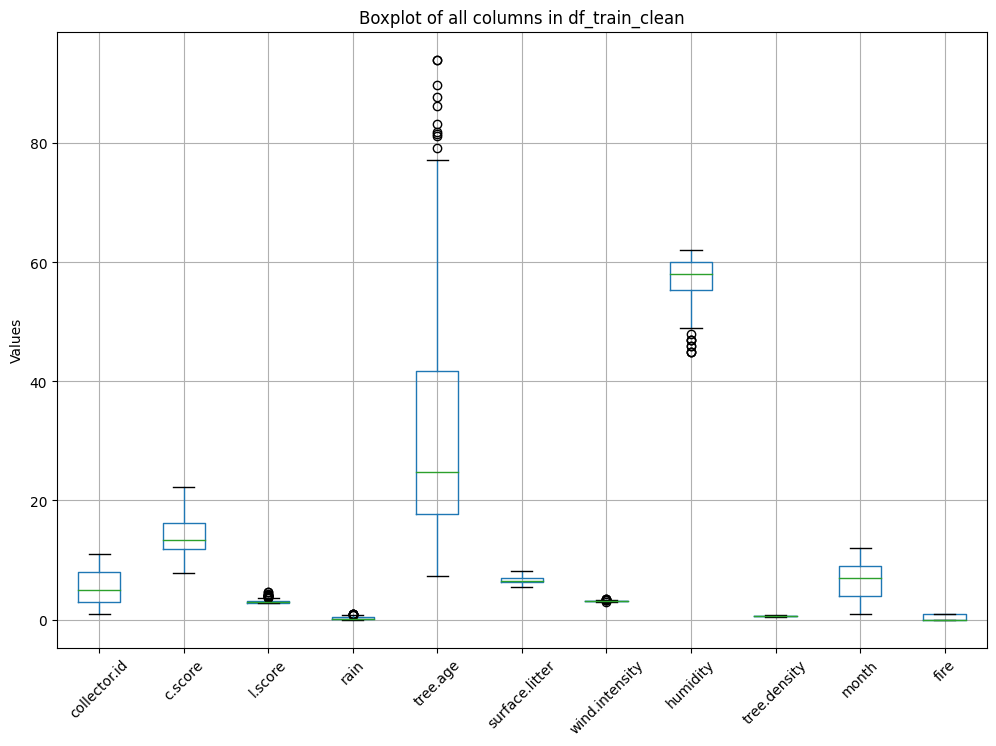

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for all columns in df_train_clean
plt.figure(figsize=(12, 8))
df_train.boxplot()
plt.title('Boxplot of all columns in df_train_clean')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Normalise

In [ ]:
#map the values
selected_features = ['c.score', 'l.score', 'rain','tree.age', 'surface.litter', 'wind.intensity', 'humidity',
                     'tree.density', 'month', 'time.of.day']
df_train_clean = pd.DataFrame(df_train)
X_train = df_train_clean[selected_features]
y_train = df_train_clean['fire']
X_train.shape
y_train.shape

(342,)

In [ ]:
df_test_clean = pd.DataFrame(df_test)
X_test = df_test_clean[selected_features]
y_test = df_test_clean['fire']
X_test.shape
y_test.shape

(114,)

In [ ]:
# normalise...
# First, determine categorical and numerical features
# we can do that automatically looking for the column data types like this:
numerical_ix = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train.select_dtypes(include=['object', 'bool']).columns

# this now contains the names of the numerical variables:
numerical_ix
categorical_ix

Index(['time.of.day'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)


# fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_train)

# transform() then makes those columns in the data set we provide
X_train_transformed = col_transform.transform(X_train)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_train_transformed)

[[0.         1.         0.42094767 ... 0.88235294 0.17539519 0.27272727]
 [0.         1.         0.26690049 ... 0.76470588 0.37972509 0.90909091]
 [0.         1.         0.21532219 ... 0.94117647 0.         0.81818182]
 ...
 [0.         0.         0.48352933 ... 0.76470588 0.42989691 0.        ]
 [1.         0.         0.22151159 ... 0.70588235 0.48934708 0.54545455]
 [0.         1.         0.29578433 ... 0.94117647 0.09608247 0.18181818]]


In [ ]:
numerical_ix_tst = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_ix_tst = X_test.select_dtypes(include=['object', 'bool']).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

tst = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix_tst), ('num', MinMaxScaler(), numerical_ix_tst)]
col_transform_tst = ColumnTransformer(transformers=tst)


# fit() works out which columns to make and stores them in "enc"
col_transform_tst.fit(X_test)

# transform() then makes those columns in the data set we provide
X_test_transformed = col_transform_tst.transform(X_test)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_test_transformed)

[[0.         0.         0.00309043 ... 0.80769231 0.73528323 0.63636364]
 [0.         1.         1.         ... 0.90384615 0.33239541 0.        ]
 [0.         1.         0.00325683 ... 0.92307692 0.41169937 0.63636364]
 ...
 [0.         1.         0.00686208 ... 0.84615385 0.78230285 0.63636364]
 [0.         1.         0.00341314 ... 0.96153846 0.22606442 0.81818182]
 [0.         1.         0.00312068 ... 0.80769231 0.59496483 0.45454545]]


# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn import model_selection

# Define models
models = [
    ('LR', LogisticRegression()),
    ('MLP', MLPClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier())
]

# Define evaluation metrics
metrics_to_calculate = ['accuracy', 'roc_auc', 'precision', 'f1', 'recall']

# Perform cross-validation for each model and metric

for name, model in models:
    print(f"Model: {name}")

    for metric in metrics_to_calculate:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring=metric)
        mean_score = np.mean(scores)
        print(f"  {metric}: {mean_score} (Std: {np.std(scores)})")





Model: LR
  accuracy: 0.885933503836317 (Std: 0.042509517583369724)
  roc_auc: 0.946500042593066 (Std: 0.032929678573015195)
  precision: 0.8882393162393163 (Std: 0.042025480236582036)
  f1: 0.8354696284108047 (Std: 0.07070601698701284)
  recall: 0.7969230769230771 (Std: 0.11323745799642063)
Model: MLP


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

  accuracy: 0.8976982097186701 (Std: 0.03294366287859801)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

  roc_auc: 0.9427939347474231 (Std: 0.03334700409668658)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

  precision: 0.8705128205128204 (Std: 0.037728937728937754)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

  f1: 0.8633069350665741 (Std: 0.04530790088594274)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

  recall: 0.844 (Std: 0.0638607953554601)
Model: DT
  accuracy: 0.8509803921568627 (Std: 0.036771568604696776)
  roc_auc: 0.8514834312973847 (Std: 0.05665501161724181)
  precision: 0.8279566810001594 (Std: 0.045266571012149044)
  f1: 0.8284932421605958 (Std: 0.052206933941156046)
  recall: 0.8126153846153846 (Std: 0.07430880712653144)
Model: RF
  accuracy: 0.9268968456947997 (Std: 0.03690464120689147)
  roc_auc: 0.9634317233154442 (Std: 0.020862368594793623)
  precision: 0.938960113960114 (Std: 0.060610652429224046)
  f1: 0.8973685282003026 (Std: 0.05058816543073748)
  recall: 0.868 (Std: 0.08897789101095507)


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid1 = {"penalty": ['l1', 'l2', 'elasticnet'],
              "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

LR_model = LogisticRegression()
#splits =KFold(n_splits = 10)  # Define the number of splits for cross-validation

# Perform the grid search
grid1 = GridSearchCV(LR_model, param_grid1, cv=5, n_jobs=-1)
grid1.fit(X_train_transformed, y_train)

# Select the best estimator
LR_model_tuned = grid1.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid1.best_params_))
print("Cross Validation accuracy: " + str(LR_model_tuned.score(X_train_transformed,y_train)))

Best Hyperparameters found: {'penalty': 'l1', 'solver': 'saga'}
Cross Validation accuracy: 0.9035087719298246


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# Define the Param Grid
param_grid = {"hidden_layer_sizes": [(5), (10)],
              "activation": ['logistic','identity','relu'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.01, 0.001]}

mlp_model = MLPClassifier()
splits =KFold(n_splits = 10)  # Define the number of splits for cross-validation

# Perform the grid search
grid = GridSearchCV(mlp_model, param_grid, cv=splits, n_jobs=-1)
grid.fit(X_train_transformed, y_train)

# Select the best estimator
mlp_model_tuned = grid.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid.best_params_))
print("Cross Validation accuracy: " + str(mlp_model_tuned.score(X_train_transformed,y_train)))

Best Hyperparameters found: {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'solver': 'adam'}
Cross Validation accuracy: 0.8830409356725146


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid2 = {"criterion" : ['gini', 'entropy'],
              "splitter" : ['best', 'random'],
               "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8]
               }

DT_model = DecisionTreeClassifier()
splits =KFold(n_splits = 10) # Define the number of splits for cross-validation

# Perform the grid search
grid2 = GridSearchCV(DT_model, param_grid2, cv=splits, n_jobs=-1)
grid2.fit(X_train_transformed, y_train)

# Select the best estimator
DT_model_tuned = grid2.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid2.best_params_))
print("Cross Validation accuracy: " + str(DT_model_tuned.score(X_train_transformed,y_train)))

Best Hyperparameters found: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'splitter': 'best'}
Cross Validation accuracy: 0.9590643274853801


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid3 = {"criterion" : ['gini', 'entropy'],
              "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "n_estimators" : [10,15,20,50,100,200],
               "bootstrap" : [True]
              }

RF_model = RandomForestClassifier()
splits =KFold(n_splits = 10)  # Define the number of splits for cross-validation

# Perform the grid search
grid3 = GridSearchCV(RF_model, param_grid3, cv=splits, n_jobs=-1)
grid3.fit(X_train_transformed, y_train)

# Select the best estimator
RF_model_tuned = grid3.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid3.best_params_))
print("Cross Validation accuracy: " + str(RF_model_tuned.score(X_train_transformed, y_train)))


Best Hyperparameters found: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'n_estimators': 10}
Cross Validation accuracy: 0.9970760233918129


# Feature Selection

In [ ]:
for i in range(0,X_train_transformed.shape[1]):
    corr_coeff = np.corrcoef(X_train_transformed[:,i], y_train)[0,1]
    print("Correlation for feature", i, ":", corr_coeff)

Correlation for feature 0 : 0.10179217653127555
Correlation for feature 1 : -0.06918121261987957
Correlation for feature 2 : 0.7031927559767642
Correlation for feature 3 : 0.5757423735715967
Correlation for feature 4 : 0.6879141582914151
Correlation for feature 5 : 0.6477660297241371
Correlation for feature 6 : 0.7271557943128449
Correlation for feature 7 : 0.3286230889648454
Correlation for feature 8 : -0.47058871302886107
Correlation for feature 9 : 0.695889219911149
Correlation for feature 10 : 0.17690732101423173


In [ ]:
X_train_transformed.shape

(342, 11)

In [ ]:
#We can use a list of boolean variables to represent which features we want to keep
features_to_include = [True] * (X_train_transformed.shape[1])
# To remove a feature, we just set the boolean at its index to false. Here we are removing feature 18
features_to_include[0,9] = False

TypeError: list indices must be integers or slices, not tuple

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn.model_selection import KFold

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'parameters': {
                "penalty": ['l1', 'l2', 'elasticnet'],
              "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

               }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {"criterion" : ['gini', 'entropy'],
              "splitter" : ['best', 'random'],
               "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8]

            }
        },

        'random_forest': {
            'model': RandomForestClassifier(),
            'parameters': {"criterion" : ['gini', 'entropy'],
              "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "n_estimators" : [10,15,20,50,100,200],
               "bootstrap" : [True]
            }
        },

        'mlp': {
            'model': MLPClassifier(),
            'parameters': {
                "hidden_layer_sizes": [(5), (10)],
              "activation": ['logistic','identity','relu'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.01, 0.001]
            }
        }

    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    pd.set_option('display.max_colwidth', None)
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train_transformed[:, features_to_include], y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

,model,best_parameters,score
0,logistic_regression,"{'penalty': 'l2', 'solver': 'lbfgs'}",0.866667
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'splitter': 'best'}",0.882609
2,random_forest,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'n_estimators': 50}",0.915942
3,mlp,"{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'solver': 'adam'}",0.865217


# Ensemble

In [ ]:
import pandas as pd
import numpy as np
# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("D:\\Machine Learning\\forestdata.csv")
df.head(5)

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


In [ ]:
df_copy = df.copy()
df_train_ensem = df_copy.sample(frac=0.75, random_state=0)
df_test_ensem = df_copy.drop(df_train_ensem.index)
df_train_ensem.shape

(342, 12)

In [ ]:
df_train_ensem.isnull().sum()

df_train_ensem_clean = df_train_ensem.dropna()

df_train_ensem_clean = df_train_ensem_clean[df_train_ensem_clean['c.score'] != 1990.200]

collector.id      0
c.score           0
l.score           0
rain              0
tree.age          1
surface.litter    0
wind.intensity    0
humidity          1
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

((254, 11), (254,))

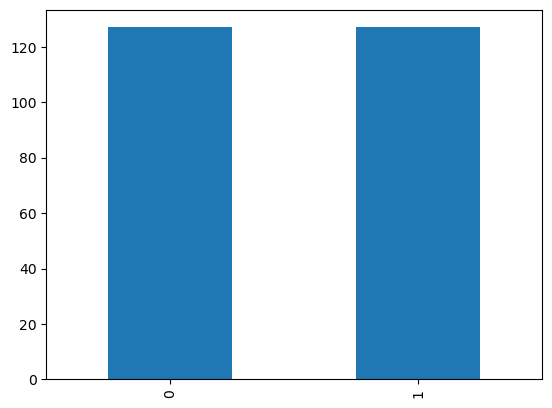

In [ ]:
targetName = 'fire'
g = df_train_ensem_clean.groupby(targetName)
df_undersampled = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

# can do this if using Pandas > 1.1.0
#df_undersampled = g.sample(g.size().min()).reset_index(drop=True)

X_undersampled = df_undersampled[selected_features]
y_undersampled = df_undersampled[targetName]

y_undersampled.value_counts().plot(kind='bar')
X_undersampled.shape,y_undersampled.shape

213


<Axes: >

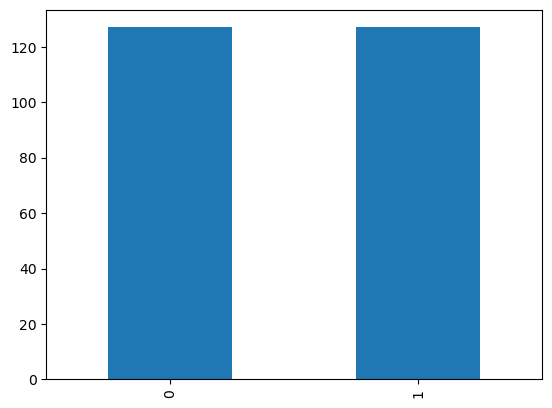

In [ ]:
g1 = df_train_ensem_clean.groupby(targetName)
df_oversampled = g1.apply(lambda x: x.sample(g1.size().max(), replace=True)).reset_index(drop=True)
print(g1.size().max())
# can do this if using Pandas > 1.1.0
#df_oversampled = g.sample(g.size().max(), replace=True).reset_index(drop=True)

X_oversampled = df_undersampled[selected_features]
y_oversampled = df_undersampled[targetName]

y_oversampled.value_counts().plot(kind='bar')

In [ ]:

#X_train_ensem = df_train_ensem_clean[selected_features]
#y_train_ensem = df_train_ensem_clean['fire']
numerical_ix3 = X_undersampled.select_dtypes(include=['int64', 'float64']).columns
categorical_ix3 = X_undersampled.select_dtypes(include=['object', 'bool']).columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

t3 = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix3), ('num', MinMaxScaler(), numerical_ix3)]
col_transform = ColumnTransformer(transformers=t3)


# fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_undersampled)

# transform() then makes those columns in the data set we provide
X_undersampled_ensem = col_transform.transform(X_undersampled)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_undersampled_ensem)

[[1.         0.         0.6        ... 0.97560976 0.13216495 0.        ]
 [0.         1.         0.4        ... 0.90243902 0.25536082 0.81818182]
 [0.         1.         0.7        ... 0.95121951 0.07158076 0.18181818]
 ...
 [1.         0.         1.         ... 0.85365854 0.58316151 0.63636364]
 [0.         1.         0.5        ... 0.75609756 0.73333333 0.63636364]
 [0.         0.         0.6        ... 0.90243902 0.52233677 0.63636364]]


In [ ]:
numerical_ix4 = X_oversampled.select_dtypes(include=['int64', 'float64']).columns
categorical_ix4 = X_oversampled.select_dtypes(include=['object', 'bool']).columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

t4 = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix4), ('num', MinMaxScaler(), numerical_ix4)]
col_transform = ColumnTransformer(transformers=t4)


# fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_oversampled)

# transform() then makes those columns in the data set we provide
X_oversampled_ensem = col_transform.transform(X_oversampled)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_oversampled_ensem)

[[1.         0.         0.6        ... 0.97560976 0.13216495 0.        ]
 [0.         1.         0.4        ... 0.90243902 0.25536082 0.81818182]
 [0.         1.         0.7        ... 0.95121951 0.07158076 0.18181818]
 ...
 [1.         0.         1.         ... 0.85365854 0.58316151 0.63636364]
 [0.         1.         0.5        ... 0.75609756 0.73333333 0.63636364]
 [0.         0.         0.6        ... 0.90243902 0.52233677 0.63636364]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn import model_selection

LR_models = LogisticRegression()


n_splits = 10


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid4 = {"penalty": ['l1', 'l2'],
              "solver" : ['liblinear']#'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

# Perform the grid search
grid4 = GridSearchCV(LR_models, param_grid4, cv=n_splits, n_jobs=-1)
grid4.fit(X_undersampled_ensem, y_undersampled)

# Select the best estimator
LR_models_tuned = grid4.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid4.best_params_))
print("Cross Validation accuracy: " + str(grid4.best_score_))


Best Hyperparameters found: {'penalty': 'l1', 'solver': 'liblinear'}
Cross Validation accuracy: 0.882


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

mlp_models = MLPClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid5 = {"hidden_layer_sizes": [(5), (10)],
              "activation": ['logistic','identity','relu'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.01, 0.001]}

# Perform the grid search
grid5 = GridSearchCV(mlp_models, param_grid5, cv=n_splits, n_jobs=-1)
grid5.fit(X_undersampled_ensem, y_undersampled)

# Select the best estimator
mlp_models_tuned = grid5.best_estimator_

# Output the results
print("Best Hyperparameters found for MLP: " + str(grid5.best_params_))
print("Cross Validation accuracy for MLP: " + str(grid5.best_score_))


Best Hyperparameters found for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'solver': 'adam'}
Cross Validation accuracy for MLP: 0.8543076923076924


C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DT_models = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid6 = {"criterion" : ['gini', 'entropy'],
              "splitter" : ['best', 'random'],
               "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "random_state" : [42]
              }


# Perform the grid search
grid6 = GridSearchCV(DT_models, param_grid6, cv=n_splits, n_jobs=-1)
grid6.fit(X_undersampled_ensem, y_undersampled)

# Select the best estimator
DT_models_tuned = grid6.best_estimator_

# Output the results
print("Best Hyperparameters found for DT: " + str(grid6.best_params_))
print("Cross Validation accuracy for DT: " + str(grid6.best_score_))


Best Hyperparameters found for DT: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'random_state': 42, 'splitter': 'best'}
Cross Validation accuracy for DT: 0.8901538461538461


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_models = RandomForestClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid7 = {"criterion" : ['gini', 'entropy'],
              "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "random_state" : [42],
               "n_estimators" : [100,200,400,500,600],
               "bootstrap" : [True]
              }

# Perform the grid search
grid7 = GridSearchCV(rf_models, param_grid7, cv=n_splits, n_jobs=-1)
grid7.fit(X_undersampled_ensem, y_undersampled)

# Select the best estimator
rf_models_tuned = grid7.best_estimator_

# Output the results
print("Best Hyperparameters found for RF: " + str(grid7.best_params_))
print("Cross Validation accuracy for RF: " + str(grid7.best_score_))

Best Hyperparameters found for RF: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'n_estimators': 400, 'random_state': 42}
Cross Validation accuracy for RF: 0.9253846153846155


In [ ]:
for i in range(X_undersampled_ensem.shape[1]):
    corr_coeff = np.corrcoef(X_undersampled_ensem[:, i], y_undersampled)[0, 1]
    print("Correlation for feature", i, ":", corr_coeff)

Correlation for feature 0 : 0.10727693995179223
Correlation for feature 1 : -0.10534347948639296
Correlation for feature 2 : 0.07810967938130978
Correlation for feature 3 : -0.04237525374398378
Correlation for feature 4 : 0.5400515900508758
Correlation for feature 5 : 0.6552883562090936
Correlation for feature 6 : 0.49926171208366626
Correlation for feature 7 : 0.7106240173848001
Correlation for feature 8 : 0.33130029824958757
Correlation for feature 9 : -0.389022340138945
Correlation for feature 10 : 0.6831582884159983
Correlation for feature 11 : 0.2392002322844481


In [ ]:
#We can use a list of boolean variables to represent which features we want to keep
features_to_include = [True] * (X_undersampled_ensem.shape[1])
# To remove a feature, we just set the boolean at its index to false. Here we are removing feature 18
indices_to_remove = [0, 2]
for idx in indices_to_remove:
    features_to_include[idx] = False

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn import model_selection

# Define models
models = [
    ('LR', LogisticRegression()),
    ('MLP', MLPClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier())
]

# Perform cross-validation for each model and metric

for name, model in models:
    print(f"Model: {name}")
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    scores1 = cross_val_score(model, X_undersampled_ensem[:, features_to_include], y_undersampled, cv=5, scoring='accuracy')
    mean_score1 = np.mean(scores1)
    print(f"Cross Validation Score after removing a feature: {mean_score1} (Std: {np.std(scores1)})")




Model: LR
Cross Validation Score after removing a feature: 0.8702745098039216 (Std: 0.02880300723331559)
Model: MLP


C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross Validation Score after removing a feature: 0.8505882352941176 (Std: 0.025846677730641712)
Model: DT
Cross Validation Score after removing a feature: 0.8623529411764705 (Std: 0.03679593444938008)
Model: RF
Cross Validation Score after removing a feature: 0.9018039215686274 (Std: 0.03695574418228005)


# Over sampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn import model_selection

LR_models = LogisticRegression()


n_splits = 10


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid8 = {"penalty": ['l1', 'l2'],
              "solver" : ['liblinear']#'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

# Perform the grid search
grid8 = GridSearchCV(LR_models, param_grid8, cv=n_splits, n_jobs=-1)
grid8.fit(X_oversampled_ensem, y_oversampled)

# Select the best estimator
LR_models_tuned = grid8.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid8.best_params_))
print("Cross Validation accuracy: " + str(grid8.best_score_))


Best Hyperparameters found: {'penalty': 'l1', 'solver': 'liblinear'}
Cross Validation accuracy: 0.882


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

mlp_models = MLPClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid9 = {"hidden_layer_sizes": [(5), (10)],
              "activation": ['logistic','identity','relu'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.01, 0.001]}

# Perform the grid search
grid9 = GridSearchCV(mlp_models, param_grid9, cv=n_splits, n_jobs=-1)
grid9.fit(X_oversampled_ensem, y_oversampled)

# Select the best estimator
mlp_models_tuned = grid9.best_estimator_

# Output the results
print("Best Hyperparameters found for MLP: " + str(grid9.best_params_))
print("Cross Validation accuracy for MLP: " + str(grid9.best_score_))


Best Hyperparameters found for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'solver': 'adam'}
Cross Validation accuracy for MLP: 0.8664615384615386


C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DT_models = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid10 = {"criterion" : ['gini', 'entropy'],
              "splitter" : ['best', 'random'],
               "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "random_state" : [42]
              }


# Perform the grid search
grid10 = GridSearchCV(DT_models, param_grid10, cv=n_splits, n_jobs=-1)
grid10.fit(X_oversampled_ensem, y_oversampled)

# Select the best estimator
DT_models_tuned = grid10.best_estimator_

# Output the results
print("Best Hyperparameters found for DT: " + str(grid10.best_params_))
print("Cross Validation accuracy for DT: " + str(grid10.best_score_))


Best Hyperparameters found for DT: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'random_state': 42, 'splitter': 'best'}
Cross Validation accuracy for DT: 0.8901538461538461


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_models = RandomForestClassifier()


from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid11 = {"criterion" : ['gini', 'entropy'],
              "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "max_features" : [2,4,8],
               "random_state" : [42],
               "n_estimators" : [100,200,400,500,600],
               "bootstrap" : [True]
              }

# Perform the grid search
grid11 = GridSearchCV(rf_models, param_grid11, cv=n_splits, n_jobs=-1)
grid11.fit(X_oversampled_ensem, y_oversampled)

# Select the best estimator
rf_models_tuned = grid11.best_estimator_

# Output the results
print("Best Hyperparameters found for RF: " + str(grid11.best_params_))
print("Cross Validation accuracy for RF: " + str(grid11.best_score_))

Best Hyperparameters found for RF: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'n_estimators': 400, 'random_state': 42}
Cross Validation accuracy for RF: 0.9253846153846155


# Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_mlp = cross_val_score(MLPClassifier(activation= 'identity', alpha= 0.001, hidden_layer_sizes= 10, solver= 'adam'), X_train_transformed, y_train, cv=10)
scores_lr = cross_val_score(LogisticRegression(penalty= 'l1', solver= 'saga'), X_train_transformed, y_train, cv=10)
scores_dr = cross_val_score(DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 4, splitter= 'best'), X_train_transformed, y_train, cv=10)
scores_rf = cross_val_score(RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 8, max_features= 2, n_estimators= 200), X_train_transformed, y_train, cv=10)
print('Average Accuracy : {}%'.format(round(sum(scores_mlp)*100/len(scores_mlp)), 3))
print('Average Accuracy : {}%'.format(round(sum(scores_lr)*100/len(scores_lr)), 3))
print('Average Accuracy : {}%'.format(round(sum(scores_dr)*100/len(scores_dr)), 3))
print('Average Accuracy : {}%'.format(round(sum(scores_rf)*100/len(scores_rf)), 3))

C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mohammad Nomaan\anacond

Average Accuracy : 87%
Average Accuracy : 89%
Average Accuracy : 88%
Average Accuracy : 93%


In [ ]:
MLP_model = MLPClassifier()
MLP_model.fit(X_train_transformed[:, features_to_include], y_train)
y_pred_MLP = MLP_model.predict(X_test_transformed[:, features_to_include])
print("Test Set Score after removing two feature: ", str(sum(y_pred_MLP == y_test)/len(y_test)))

Test Set Score after removing two feature:  0.7280701754385965


C:\Users\Mohammad Nomaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train_transformed[:, features_to_include], y_train)
y_pred_LR = LR_model.predict(X_test_transformed[:, features_to_include])
print("Test Set Score after removing two feature: ", str(sum(y_pred_LR == y_test)/len(y_test)))

Test Set Score after removing two feature:  0.7192982456140351


In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_transformed[:, features_to_include], y_train)
y_pred_DT = DT_model.predict(X_test_transformed[:, features_to_include])
print("Test Set Score after removing two feature: ", str(sum(y_pred_DT == y_test)/len(y_test)))

Test Set Score after removing two feature:  0.8596491228070176


In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_transformed[:, features_to_include], y_train)
y_pred_RF = RF_model.predict(X_test_transformed[:, features_to_include])
print("Test Set Score after removing two feature: ", str(sum(y_pred_RF == y_test)/len(y_test)))

Test Set Score after removing two feature:  0.9035087719298246


In [ ]:
classifier = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 8, max_features= 2, n_estimators= 200)
classifier.fit(X_train_transformed[:, features_to_include], y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=2,
                       n_estimators=200)

<Figure size 1000x700 with 0 Axes>

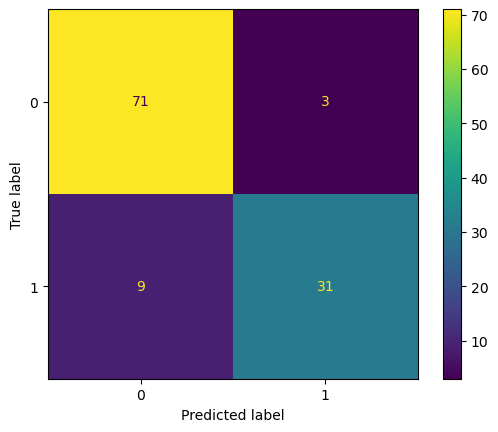

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred_rf = classifier.predict(X_test_transformed[:, features_to_include])
cm = confusion_matrix(y_test, y_pred_rf)
cm

# Plotting the confusion matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred_rf),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 89.47%


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        74
           1       0.91      0.78      0.84        40

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



In [ ]:
y_train.shape

(342,)

<Figure size 1000x700 with 0 Axes>

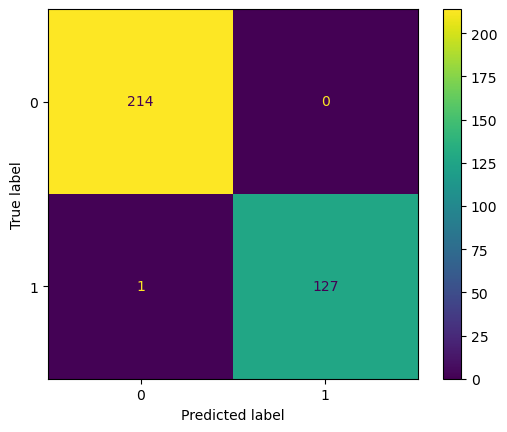

In [ ]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train_transformed[:, features_to_include])
cm = confusion_matrix(y_train, y_train_pred)
cm

# Plotting the confusion matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Accuracy Score
score1 = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score1))

Accuracy on trainning set: 99.71%


In [ ]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      0.99      1.00       128

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342

